In [3]:
from IPython import display

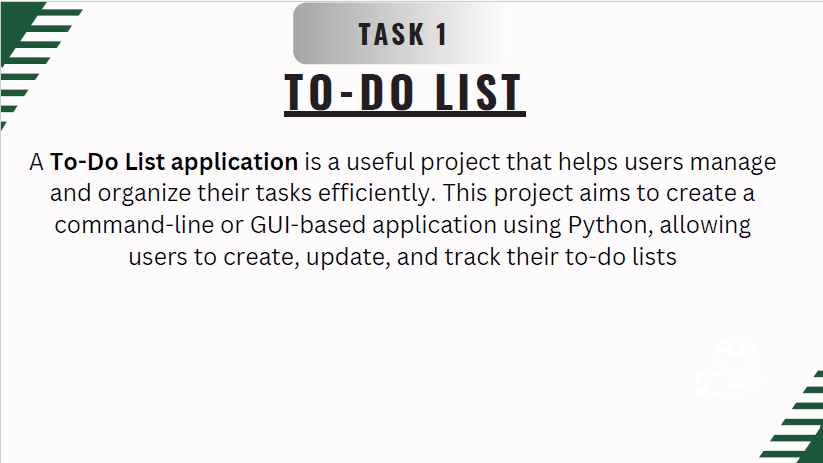

In [5]:
display.Image("D:/4. CodSoft/TASK1.png")

In [ ]:
from tkinter import *
from tkinter import messagebox
import sqlite3 as sql

# Database Operations
class TaskDatabase:
    def __init__(self, db_name='listOfTasks.db'):
        self.conn = sql.connect(db_name)
        self.cursor = self.conn.cursor()
        self.cursor.execute('CREATE TABLE IF NOT EXISTS tasks (title TEXT, completed INTEGER)')

    def add_task(self, task):
        self.cursor.execute('INSERT INTO tasks (title, completed) VALUES (?, ?)', (task, 0))
        self.conn.commit()

    def delete_task(self, task):
        self.cursor.execute('DELETE FROM tasks WHERE title = ?', (task,))
        self.conn.commit()

    def delete_all_tasks(self):
        self.cursor.execute('DELETE FROM tasks')
        self.conn.commit()

    def get_tasks(self):
        self.cursor.execute('SELECT title, completed FROM tasks')
        return self.cursor.fetchall()

    def close(self):
        self.conn.close()

# GUI for Task Management
class TaskManager:
    def __init__(self, root):
        self.db = TaskDatabase()
        self.tasks = []

        # Window setup
        root.title("To-Do List")
        root.geometry("665x400+550+250")
        root.resizable(0, 0)
        root.configure(bg="#B5E5CF")

        # Frame
        self.functions_frame = Frame(root, bg="#8EE5EE")
        self.functions_frame.pack(side="top", expand=True, fill="both")

        # Widgets
        self.create_widgets()
        self.retrieve_database()
        self.update_listbox()

    def create_widgets(self):
        Label(
            self.functions_frame,
            text="TO-DO-LIST \n Enter the Task Title:",
            font=("arial", "14", "bold"),
            bg="#8EE5EE", fg="#FF6103"
        ).place(x=20, y=30)

        self.task_field = Entry(
            self.functions_frame,
            font=("Arial", "14"),
            width=42, fg="black", bg="white"
        )
        self.task_field.place(x=180, y=30)

        Button(
            self.functions_frame, text="Add", width=15,
            bg='#D4AC0D', font=("arial", "14", "bold"),
            command=self.add_task
        ).place(x=18, y=80)

        Button(
            self.functions_frame, text="Remove", width=15,
            bg='#D4AC0D', font=("arial", "14", "bold"),
            command=self.delete_task
        ).place(x=240, y=80)

        Button(
            self.functions_frame, text="Delete All", width=15,
            bg='#D4AC0D', font=("arial", "14", "bold"),
            command=self.delete_all_tasks
        ).place(x=460, y=80)

        Button(
            self.functions_frame, text="Exit / Close", width=52,
            bg='#D4AC0D', font=("arial", "14", "bold"),
            command=self.close
        ).place(x=17, y=330)

        self.task_listbox = Listbox(
            self.functions_frame, width=70, height=9,
            font="bold", selectmode='SINGLE',
            bg="WHITE", fg="BLACK",
            selectbackground="#FF8C00", selectforeground="BLACK"
        )
        self.task_listbox.place(x=17, y=140)

    def add_task(self):
        task = self.task_field.get().strip()
        if not task:
            messagebox.showinfo('Error', 'Field is Empty.')
            return

        if task in self.tasks:
            messagebox.showinfo('Error', 'Task already exists.')
            return

        self.tasks.append(task)
        self.db.add_task(task)
        self.update_listbox()
        self.task_field.delete(0, 'end')

    def delete_task(self):
        try:
            selected_task = self.task_listbox.get(self.task_listbox.curselection())
            if selected_task in self.tasks:
                self.tasks.remove(selected_task)
                self.db.delete_task(selected_task)
                self.update_listbox()
        except:
            messagebox.showinfo('Error', 'No Task Selected. Cannot Delete.')

    def delete_all_tasks(self):
        if messagebox.askyesno('Delete All', 'Are you sure?'):
            self.tasks.clear()
            self.db.delete_all_tasks()
            self.update_listbox()

    def update_listbox(self):
        self.task_listbox.delete(0, 'end')
        for task in self.tasks:
            self.task_listbox.insert('end', task)

    def retrieve_database(self):
        self.tasks.clear()
        for task, completed in self.db.get_tasks():
            self.tasks.append(task)

    def close(self):
        self.db.close()
        guiWindow.destroy()

if __name__ == "__main__":
    guiWindow = Tk()
    app = TaskManager(guiWindow)
    guiWindow.mainloop()